In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import load_diabetes
df = load_diabetes()

In [14]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [16]:
x = df.data
y = df.target

# split data for prevent data leakage
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

# apply linear regression on data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# fit lr to data
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
# calculate accuracy
from sklearn.metrics import r2_score, mean_squared_error
print('r2_score : ', r2_score(y_test, y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score :  0.3670103737004131
RMSE :  55.715405228997824


In [17]:
# Ridge regression with hyperparameter alpha=0.001
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.001)
# Train Model
reg.fit(x_train, y_train)
y_pred1 = reg.predict(x_test)
# calculate accuracy
print('r2_score_ridge : ', r2_score(y_test, y_pred1))
print('RMSE_ridge : ', np.sqrt(mean_squared_error(y_test, y_pred1)))

r2_score_ridge :  0.36580828203886095
RMSE_ridge :  55.76828386543626


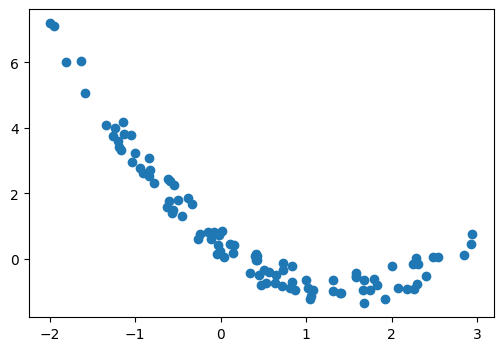

In [31]:
# generate data (non-linear)
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + np.random.rand(m, 1)
plt.figure(figsize=[6,4])
plt.scatter(x1, x2)
plt.show()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
  model = Pipeline([
      ('Poly_Feat ', PolynomialFeatures(degree=16)),
      ('Ridge ', Ridge(alpha=alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)

In [26]:
alphas = [0, 20, 200]
cs = ['r', 'b', 'g']

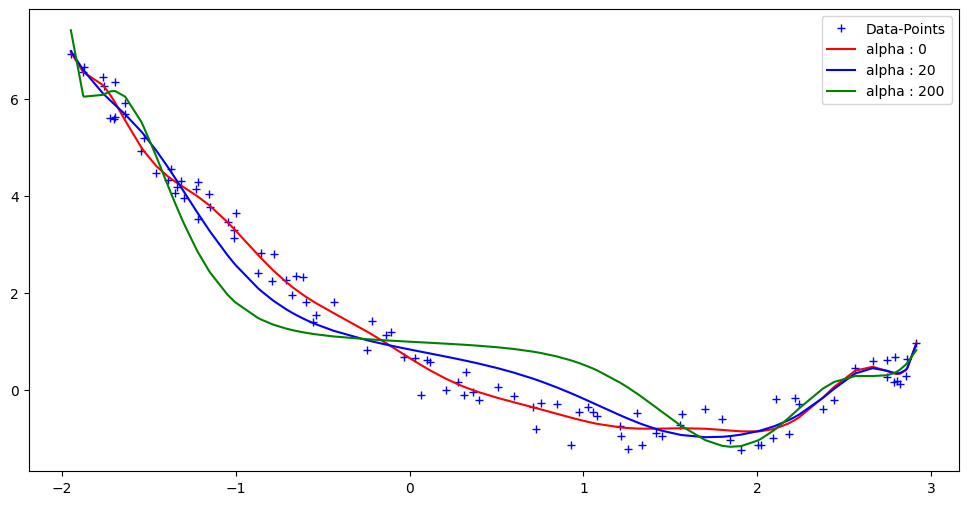

In [30]:
plt.figure(figsize=[12,6])
plt.plot(x1, x2, 'b+', label='Data-Points')

for alpha, c in zip(alphas, cs):
  preds = get_preds_ridge(x1, x2, alpha)
  # plot
  plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label = 'alpha : {}'.format(alpha))
plt.legend()
plt.show()